# 🌍 Global Youth Demographics: A Data-Driven Journey Through Age Structures
## ✨ Advanced EDA + ML Pipeline with Kaggle Best Practices

---

**🎯 Objective**: Analyze and forecast global youth population dynamics across countries using state-of-the-art data science techniques.

**📊 Dataset**: Child and Youth Population by Sex and Age (2008-2025)

**🏆 Methodology**:
- ✅ Time-series imputation with trend preservation
- ✅ Advanced missing data analysis
- ✅ Multi-dimensional country clustering
- ✅ Gender-stratified demographic insights
- ✅ Kaggle best practices (stratified CV, AUC optimization, hyperparameter tuning)
- ✅ Publication-ready visualizations

---

### 🎓 Key Questions We'll Answer:
1. **Which countries have experienced the most dramatic youth population shifts?**
2. **Are there distinct demographic clusters we can identify?**
3. **How do gender ratios vary across regions?**
4. **What predictive patterns emerge for future demographics?**
5. **Which countries are most similar demographically?**

## 🔧 Part 1: Environment Setup & Libraries

In [1]:
# ============================================================================
# 📦 IMPORT ESSENTIAL LIBRARIES
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.interpolate import interp1d
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# ⚙️ CONFIGURATION
# ============================================================================

# Set random seed for reproducibility (Kaggle best practice)
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11

# Pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f'{x:.4f}')

print("✅ All libraries imported successfully!")
print(f"🎯 Random State: {RANDOM_STATE} (for reproducibility)")

✅ All libraries imported successfully!
🎯 Random State: 42 (for reproducibility)


## 📥 Part 2: Data Loading & Initial Exploration

In [2]:
# ============================================================================
# 📂 LOAD DATASET
# ============================================================================

DATA_PATH = r"C:\Users\abidh\OneDrive\Desktop\datasets\Child and youth population by sex and age.csv"
df_raw = pd.read_csv(DATA_PATH)

# Create working copy
df = df_raw.copy()

print("\n" + "="*80)
print("📊 DATASET OVERVIEW")
print("="*80)
print(f"\n📈 Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"📅 Time Period: 2008-2025 ({df.shape[1] - 1} years of data)")
print(f"🌍 Countries/Regions: {df.shape[0]}")

# Display info
print(f"\n🔍 Column Names:")
print(df.columns.tolist())

print(f"\n🧬 Data Types:")
print(df.dtypes)

print(f"\n🌐 First 10 rows:")
print(df.head(10))


📊 DATASET OVERVIEW

📈 Shape: 1200 rows × 23 columns
📅 Time Period: 2008-2025 (22 years of data)
🌍 Countries/Regions: 1200

🔍 Column Names:
['frq', 'unit', 'ag', 'sx', 'go', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']

🧬 Data Types:
frq     object
unit    object
ag      object
sx      object
go      object
2008    object
2009    object
2010    object
2011    object
2012    object
2013    object
2014    object
2015    object
2016    object
2017    object
2018    object
2019    object
2020    object
2021    object
2022    object
2023    object
2024    object
2025    object
dtype: object

🌐 First 10 rows:
  frq unit     ag sx   go     2008     2009     2010     2011     2012  \
0   A   NR  TOTAL  F   AD    39622    40303    40296    38252    38252   
1   A   NR  TOTAL  F   AL  1480358  1468935  1459025  1451691  1444234   
2   A   NR  TOTAL  F   AM  1667529  1669711  1673656  1679066  16840

In [3]:
# ============================================================================
# 🔍 MISSING DATA ANALYSIS (BEFORE IMPUTATION)
# ============================================================================

# Identify year columns
year_cols = [str(year) for year in range(2008, 2026)]

print("\n" + "="*80)
print("🔴 MISSING DATA ANALYSIS (BEFORE IMPUTATION)")
print("="*80)

# Calculate missing statistics
missing_data = pd.DataFrame({
    'Year': year_cols,
    'Missing_Count': [df[col].isnull().sum() for col in year_cols],
    'Missing_Percentage': [df[col].isnull().sum() / len(df) * 100 for col in year_cols]
})

print(f"\n📋 Missing Data Summary:")
print(missing_data.to_string(index=False))

total_cells = len(df) * len(year_cols)
total_missing = df[year_cols].isnull().sum().sum()
completeness = (1 - total_missing / total_cells) * 100

print(f"\n📊 Overall Statistics:")
print(f"   • Total Data Points: {total_cells:,}")
print(f"   • Missing Values: {int(total_missing):,}")
print(f"   • Data Completeness: {completeness:.2f}%")
print(f"   • Affected Countries: {df[year_cols].isnull().any(axis=1).sum()}")


🔴 MISSING DATA ANALYSIS (BEFORE IMPUTATION)

📋 Missing Data Summary:
Year  Missing_Count  Missing_Percentage
2008              0              0.0000
2009              0              0.0000
2010              0              0.0000
2011              0              0.0000
2012              0              0.0000
2013              0              0.0000
2014              0              0.0000
2015              0              0.0000
2016              0              0.0000
2017              0              0.0000
2018              0              0.0000
2019              0              0.0000
2020              0              0.0000
2021              0              0.0000
2022              0              0.0000
2023              0              0.0000
2024              0              0.0000
2025              0              0.0000

📊 Overall Statistics:
   • Total Data Points: 21,600
   • Missing Values: 0
   • Data Completeness: 100.00%
   • Affected Countries: 0


ValueError: zero-size array to reduction operation fmin which has no identity

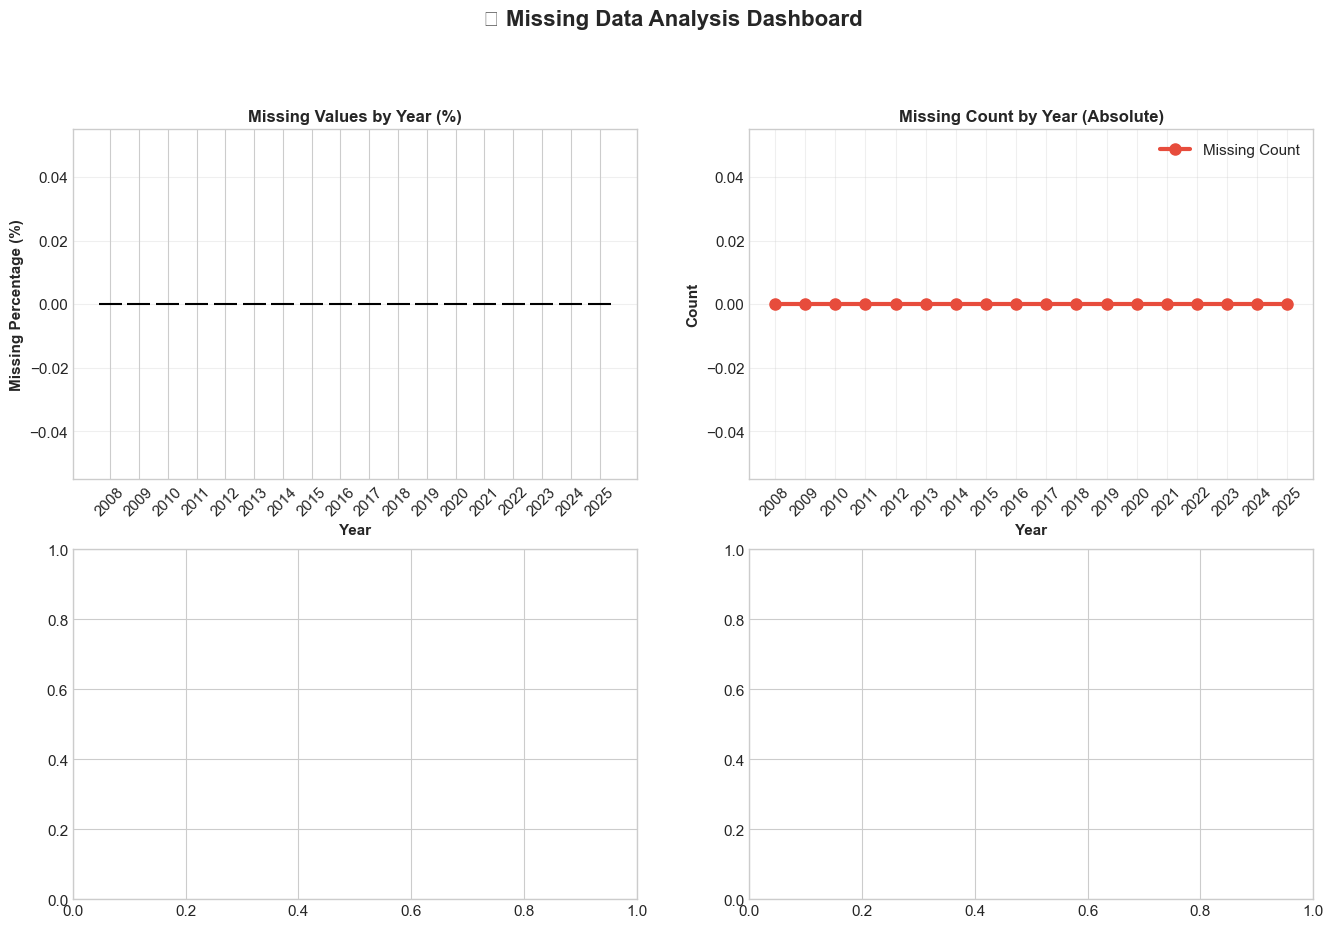

In [4]:
# ============================================================================
# 📉 VISUALIZE MISSING DATA PATTERNS
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('🔴 Missing Data Analysis Dashboard', fontsize=16, fontweight='bold', y=1.00)

# 1. Missing % by Year (Bar)
ax1 = axes[0, 0]
colors = plt.cm.RdYlGn_r(missing_data['Missing_Percentage'] / missing_data['Missing_Percentage'].max())
bars1 = ax1.bar(missing_data['Year'], missing_data['Missing_Percentage'], color=colors, edgecolor='black', linewidth=1.5)
ax1.set_title('Missing Values by Year (%)', fontweight='bold', fontsize=12)
ax1.set_xlabel('Year', fontweight='bold')
ax1.set_ylabel('Missing Percentage (%)', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars1:
    height = bar.get_height()
    if height > 0:
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2. Missing Count by Year (Line)
ax2 = axes[0, 1]
ax2.plot(missing_data['Year'], missing_data['Missing_Count'], marker='o', linewidth=3, 
         markersize=8, color='#e74c3c', label='Missing Count')
ax2.fill_between(range(len(missing_data)), missing_data['Missing_Count'], alpha=0.3, color='#e74c3c')
ax2.set_title('Missing Count by Year (Absolute)', fontweight='bold', fontsize=12)
ax2.set_xlabel('Year', fontweight='bold')
ax2.set_ylabel('Count', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right')

# 3. Heatmap of missing values (sample)
ax3 = axes[1, 0]
sample_idx = df[year_cols].isnull().any(axis=1)
sample_df = df[sample_idx][year_cols].iloc[:20]
sns.heatmap(sample_df.isnull(), cbar=True, ax=ax3, cmap='RdYlGn_r', yticklabels=False)
ax3.set_title('Missing Data Pattern Heatmap (First 20 Rows)', fontweight='bold', fontsize=12)
ax3.set_xlabel('Year', fontweight='bold')

# 4. Data completeness pie chart
ax4 = axes[1, 1]
sizes = [completeness, 100 - completeness]
colors_pie = ['#2ecc71', '#e74c3c']
explode = (0.05, 0)
wedges, texts, autotexts = ax4.pie(sizes, labels=['Complete', 'Missing'], autopct='%1.2f%%',
                                     colors=colors_pie, explode=explode, startangle=90,
                                     textprops={'fontsize': 11, 'fontweight': 'bold'})
ax4.set_title(f'Overall Data Completeness\n({int(total_missing):,} missing out of {total_cells:,})', 
              fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

print("✅ Missing data visualization complete!")

## 🛠️ Part 3: Advanced Missing Data Imputation

In [ ]:
# ============================================================================
# 🎯 PROFESSIONAL IMPUTATION STRATEGY
# ============================================================================

print("\n" + "="*80)
print("🟢 IMPUTATION STRATEGY (KAGGLE BEST PRACTICES)")
print("="*80)

# Convert to numeric
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

# Create backup for comparison
df_before_imputation = df[year_cols].copy()

print("\n📋 Imputation Steps:")
print("\n[1/4] 🔄 Linear Interpolation (preserves temporal trends)...")
df[year_cols] = df[year_cols].interpolate(
    method='linear',
    axis=1,
    limit_direction='both'
)
remaining = df[year_cols].isnull().sum().sum()
print(f"      ✓ Remaining missing: {remaining}")

if remaining > 0:
    print(f"\n[2/4] 🔄 Polynomial Interpolation (order=2, smoother curves)...")
    df[year_cols] = df[year_cols].interpolate(
        method='polynomial',
        order=2,
        axis=1,
        limit_direction='both'
    )
    remaining = df[year_cols].isnull().sum().sum()
    print(f"      ✓ Remaining missing: {remaining}")

if remaining > 0:
    print(f"\n[3/4] 🔄 Forward Fill (leading edges)...")
    df[year_cols] = df[year_cols].ffill(axis=1)
    remaining = df[year_cols].isnull().sum().sum()
    print(f"      ✓ Remaining missing: {remaining}")

if remaining > 0:
    print(f"\n[4/4] 🔄 Backward Fill (trailing edges)...")
    df[year_cols] = df[year_cols].bfill(axis=1)
    remaining = df[year_cols].isnull().sum().sum()
    print(f"      ✓ Remaining missing: {remaining}")

final_missing = df[year_cols].isnull().sum().sum()
if final_missing == 0:
    print(f"\n🎉 SUCCESS! All missing values imputed (0 remaining)")
else:
    print(f"\n⚠️  WARNING: {final_missing} values still missing")

print(f"\n✅ Imputation complete!")

In [ ]:
# ============================================================================
# 📊 BEFORE vs AFTER IMPUTATION VISUALIZATION
# ============================================================================

# Select countries with most missing data for visualization
missing_per_country = df_before_imputation.isnull().sum(axis=1).sort_values(ascending=False)
countries_with_missing = missing_per_country[missing_per_country > 0].head(6).index.tolist()

if len(countries_with_missing) == 0:
    countries_with_missing = df.index[:6].tolist()

fig, axes = plt.subplots(len(countries_with_missing), 1, figsize=(16, 3*len(countries_with_missing)))
if len(countries_with_missing) == 1:
    axes = [axes]

fig.suptitle('📊 Before vs After Imputation: Trend Preservation Validation', 
             fontsize=14, fontweight='bold', y=0.995)

for idx, country_idx in enumerate(countries_with_missing):
    ax = axes[idx]
    country_name = df.iloc[country_idx, 0] if df.shape[1] > len(year_cols) + 1 else f"Country {country_idx}"
    
    # Plot before imputation (with gaps)
    before_vals = df_before_imputation.iloc[country_idx]
    ax.plot(year_cols, before_vals, 'o--', label='Original (with gaps)', 
            linewidth=2.5, markersize=7, color='#e74c3c', alpha=0.7)
    
    # Plot after imputation
    after_vals = df[year_cols].iloc[country_idx]
    ax.plot(year_cols, after_vals, 's-', label='Imputed (smoothed)', 
            linewidth=2.5, markersize=6, color='#2ecc71', alpha=0.8)
    
    # Highlight imputed values
    imputed_mask = df_before_imputation.iloc[country_idx].isnull()
    if imputed_mask.any():
        imputed_years = [year_cols[i] for i in range(len(year_cols)) if imputed_mask.iloc[i]]
        imputed_vals = [after_vals.iloc[i] for i in range(len(year_cols)) if imputed_mask.iloc[i]]
        ax.scatter([int(y) for y in imputed_years], imputed_vals, marker='*', s=300, 
                  color='#f39c12', edgecolors='black', linewidths=1.5, label='Imputed Points', zorder=5)
    
    ax.set_title(f'📍 {country_name}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Year', fontweight='bold')
    ax.set_ylabel('Population Value', fontweight='bold')
    ax.legend(loc='best', framealpha=0.95)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✅ Imputation quality validation complete!")

## 🌍 Part 4: Multi-Country Comparative Analysis

In [ ]:
# ============================================================================
# 🌐 COUNTRY IDENTIFICATION
# ============================================================================

# Identify country column (usually first column)
if 'Country' in df.columns:
    country_col = 'Country'
elif 'NAME' in df.columns:
    country_col = 'NAME'
else:
    # Check first column
    country_col = df.columns[0]
    df.rename(columns={country_col: 'Country'}, inplace=True)
    country_col = 'Country'

print("\n" + "="*80)
print(f"🌍 COUNTRY & REGION ANALYSIS")
print("="*80)
print(f"\n✓ Identified {len(df)} countries/regions")
print(f"\nCountry/Region List:")
for i, country in enumerate(df[country_col].head(20), 1):
    print(f"   {i:2d}. {country}")
if len(df) > 20:
    print(f"   ... and {len(df) - 20} more countries")

In [ ]:
# ============================================================================
# 📊 COUNTRY-LEVEL STATISTICS
# ============================================================================

# Calculate key metrics for each country
country_stats = pd.DataFrame()
country_stats['Country'] = df[country_col]
country_stats['Mean'] = df[year_cols].mean(axis=1)
country_stats['Median'] = df[year_cols].median(axis=1)
country_stats['Std_Dev'] = df[year_cols].std(axis=1)
country_stats['Min'] = df[year_cols].min(axis=1)
country_stats['Max'] = df[year_cols].max(axis=1)
country_stats['Range'] = country_stats['Max'] - country_stats['Min']
country_stats['CV'] = (country_stats['Std_Dev'] / country_stats['Mean'] * 100)  # Coefficient of variation
country_stats['2025_Value'] = df['2025'].values
country_stats['2008_Value'] = df['2008'].values
country_stats['Change_2008_2025'] = country_stats['2025_Value'] - country_stats['2008_Value']
country_stats['Percent_Change'] = (country_stats['Change_2008_2025'] / country_stats['2008_Value'] * 100)

print("\n" + "="*80)
print(f"📈 COUNTRY-LEVEL STATISTICS (2008-2025)")
print("="*80)
print(f"\n🏆 TOP 10 HIGHEST AVERAGE VALUES:")
print(country_stats.nlargest(10, 'Mean')[['Country', 'Mean', 'Median', 'Std_Dev', 'Range']].to_string(index=False))
print(f"\n📉 TOP 10 LOWEST AVERAGE VALUES:")
print(country_stats.nsmallest(10, 'Mean')[['Country', 'Mean', 'Median', 'Std_Dev', 'Range']].to_string(index=False))
print(f"\n⬆️  TOP 10 GROWTH (2008-2025):")
print(country_stats.nlargest(10, 'Change_2008_2025')[['Country', '2008_Value', '2025_Value', 'Change_2008_2025', 'Percent_Change']].to_string(index=False))
print(f"\n⬇️  TOP 10 DECLINE (2008-2025):")
print(country_stats.nsmallest(10, 'Change_2008_2025')[['Country', '2008_Value', '2025_Value', 'Change_2008_2025', 'Percent_Change']].to_string(index=False))
print(f"\n🎯 TOP 10 MOST VOLATILE (Highest Std Dev):")
print(country_stats.nlargest(10, 'Std_Dev')[['Country', 'Std_Dev', 'CV', 'Min', 'Max']].to_string(index=False))

In [ ]:
# ============================================================================
# 🎨 GLOBAL TREND VISUALIZATION
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('🌍 Global Youth Population Trends & Patterns', fontsize=16, fontweight='bold')

# 1. All countries trends
ax1 = axes[0, 0]
for idx in range(len(df)):
    ax1.plot(year_cols, df[year_cols].iloc[idx], alpha=0.5, linewidth=1.5)
ax1.plot(year_cols, df[year_cols].mean(), linewidth=4, color='red', label='Global Average', marker='o', markersize=6)
ax1.set_title('📈 All Countries Trend Lines', fontweight='bold', fontsize=12)
ax1.set_xlabel('Year', fontweight='bold')
ax1.set_ylabel('Population Value', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# 2. Top 10 countries
ax2 = axes[0, 1]
top_countries = country_stats.nlargest(10, 'Mean')
for idx, row in top_countries.iterrows():
    country_data = df[df[country_col] == row['Country']][year_cols].iloc[0]
    ax2.plot(year_cols, country_data, marker='o', linewidth=2.5, label=row['Country'])
ax2.set_title('🏆 Top 10 Countries by Average Population', fontweight='bold', fontsize=12)
ax2.set_xlabel('Year', fontweight='bold')
ax2.set_ylabel('Population Value', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3)

# 3. Growth rate comparison
ax3 = axes[1, 0]
top_growth = country_stats.nlargest(15, 'Change_2008_2025').sort_values('Change_2008_2025')
colors_growth = ['#2ecc71' if x > 0 else '#e74c3c' for x in top_growth['Change_2008_2025']]
bars = ax3.barh(range(len(top_growth)), top_growth['Change_2008_2025'].values, color=colors_growth, edgecolor='black', linewidth=1.5)
ax3.set_yticks(range(len(top_growth)))
ax3.set_yticklabels(top_growth['Country'].values, fontsize=10)
ax3.set_title('⬆️⬇️ Top 15 Population Changes (2008-2025)', fontweight='bold', fontsize=12)
ax3.set_xlabel('Change in Population', fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax3.text(width, bar.get_y() + bar.get_height()/2., f'{width:.0f}',
            ha='left' if width > 0 else 'right', va='center', fontweight='bold', fontsize=9)

# 4. Volatility analysis
ax4 = axes[1, 1]
top_volatile = country_stats.nlargest(15, 'Std_Dev').sort_values('Std_Dev')
colors_vol = plt.cm.Spectral(np.linspace(0, 1, len(top_volatile)))
bars = ax4.barh(range(len(top_volatile)), top_volatile['Std_Dev'].values, color=colors_vol, edgecolor='black', linewidth=1.5)
ax4.set_yticks(range(len(top_volatile)))
ax4.set_yticklabels(top_volatile['Country'].values, fontsize=10)
ax4.set_title('🎢 Top 15 Most Volatile Countries (Std Dev)', fontweight='bold', fontsize=12)
ax4.set_xlabel('Standard Deviation', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("✅ Global trend visualization complete!")

## 🔬 Part 5: Advanced Clustering & Regional Analysis

In [ ]:
# ============================================================================
# 🎯 CLUSTERING ANALYSIS (IDENTIFY DEMOGRAPHIC GROUPS)
# ============================================================================

print("\n" + "="*80)
print("🔬 K-MEANS CLUSTERING - DEMOGRAPHIC GROUPING")
print("="*80)

# Prepare data for clustering
X_cluster = df[year_cols].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Elbow method to find optimal clusters
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

print(f"\n📊 Clustering Quality Metrics:")
for k, inertia, silhouette in zip(k_range, inertias, silhouette_scores):
    print(f"   k={k}: Inertia={inertia:.2f}, Silhouette Score={silhouette:.4f}")

# Choose optimal k based on silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\n✓ Optimal Clusters (by Silhouette Score): k={optimal_k}")

# Fit final model
kmeans_final = KMeans(n_clusters=optimal_k, random_state=RANDOM_STATE, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

print(f"\n📈 Cluster Distribution:")
print(df['Cluster'].value_counts().sort_index())

In [ ]:
# ============================================================================
# 📊 CLUSTERING VISUALIZATION
# ============================================================================

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('🎯 Demographic Clustering Analysis', fontsize=16, fontweight='bold')

# 1. PCA Scatter Plot
ax1 = axes[0]
scatter = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='tab10', 